In [1]:
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder
df_sessions = pd.read_csv('ga_sessions.csv')


C:\Users\DIMA\AppData\Local\Temp\ipykernel_4468\2569658452.py:3: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df_sessions = pd.read_csv('ga_sessions.csv')


In [10]:
df_hits = pd.read_csv('ga_hits.csv')

In [15]:
df_hits['hit_type'].unique()

array([1], dtype=int64)

In [13]:
df_hits['event_value'].unique()

array([nan])

In [11]:
def preprocess(df_hits):
    # колонки session_id и hit_type закодируем после объединения датасетов hits и sessions
    # колонки hit_referer удалим как неинформативные
    # hit_number не требует дополнительной обработки

    # обработаем колонку "hit_date"
    df_hits['hit_date'] = pd.to_datetime(df_hits['hit_date'], format="%Y-%m-%d")

    # извлечем в отдельные колонки год, месяц, день, день недели, будний или выходной день
    df_hits['year'] = df_hits['hit_date'].dt.year
    df_hits['month'] = df_hits['hit_date'].dt.month
    df_hits['day'] = df_hits['hit_date'].dt.day
    df_hits['dayofweek'] = df_hits['hit_date'].dt.day_of_week
    df_hits['is_weekend'] = df_hits['dayofweek'].isin([5, 6]).astype(int)

    # -------------------------------------------------------------------------------

    # обработаем колонку "hit_time"
    # заполнить пропуски методом интерполяции
    df_hits['hit_time'] = df_hits['hit_time'].interpolate(method='linear')

    # -------------------------------------------------------------------------------

    # обработаем колонку "hit_page_path"
    # сохраним интернет-страницы в отдельные колонки
    df_hits['hit_page_path_sberauto.com'] = df_hits['hit_page_path'].str.startswith('sberauto.com/').fillna(0).astype(int)
    df_hits['hit_page_path_podpiska.sberauto.com'] = df_hits['hit_page_path'].str.startswith('podpiska.sberauto.com/').fillna(0).astype(int)
    df_hits['hit_page_path_client'] = df_hits['hit_page_path'].str.startswith('client').fillna(0).astype(int)

    # -------------------------------------------------------------------------------

    # обработаем колонки event_category, event_action, event_label
    # заполним пропуски в колонке event_label нолями
    df_hits['event_label'] = df_hits['event_label'].fillna('0')

    # закодируем колонки event_category, event_action, event_label с помощью OrdinalEncoder
    ordinal_encoders = {}
    oe_cols = ['event_category', 'event_action', 'event_label']
    for col in oe_cols:
        oe = OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1)
        df_hits[[col]] = oe.fit_transform(df_hits[[col]])
        ordinal_encoders[col] = oe

    # -------------------------------------------------------------------------------

    # удаляем колонки
    df_hits.drop(columns = ['hit_date', 'hit_referer', 'hit_page_path'], inplace = True)
    df_hits['hit_type'] = df_hits['hit_type'].apply(lambda x: 1 if x == 'event' else 0)

    return df_hits
preprocess(df_hits)

,session_id,hit_time,hit_number,hit_type,event_category,event_action,event_label,event_value,year,month,day,dayofweek,is_weekend,hit_page_path_sberauto.com,hit_page_path_podpiska.sberauto.com,hit_page_path_client
0,5639623078712724064.1640254056.1640254056,597864.0,30,1,41.0,131.0,0.0,NaN,2021,12,23,3,0,1,0,0
1,7750352294969115059.1640271109.1640271109,597331.0,41,1,41.0,131.0,0.0,NaN,2021,12,23,3,0,1,0,0
2,885342191847998240.1640235807.1640235807,796252.0,49,1,41.0,131.0,0.0,NaN,2021,12,23,3,0,1,0,0
3,142526202120934167.1640211014.1640211014,934292.0,46,1,41.0,131.0,0.0,NaN,2021,12,23,3,0,1,0,0
4,3450086108837475701.1640265078.1640265078,768741.0,79,1,41.0,131.0,0.0,NaN,2021,12,23,3,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15726465,6866159858916559617.1640270865.1640270865,810589.0,43,1,41.0,131.0,0.0,NaN,2021,12,23,3,0,1,0,0
15726466,7310304587364460692.1640261783.1640261783,904927.0,40,1,41.0,131.0,0.0,NaN,2021,12,23,3,0,1,0,0
15726467,8013702685784312179.1640270195.1640270195,2172865.0,43,1,41.0,131.0,0.0,NaN,2021,12,23,3,0,1,0,0
15726468,8021505554734405918.1640257821.1640257821,713325.0,45,1,41.0,131.0,0.0,NaN,2021,12,23,3,0,1,0,0


In [4]:
import pandas as pd


# 1. Удаляем ненужные столбцы
drop_cols = ['client_id', 'device_model', 'device_screen_resolution']
df_sessions = df_sessions.drop(columns=drop_cols)

# 2. Заполняем пропуски в категориальных признаках текстом 'unknown'
fillna_cols = [
    'utm_campaign', 'utm_adcontent', 'utm_keyword',
    'device_os', 'device_brand',
    'utm_source'
]
df_sessions[fillna_cols] = df_sessions[fillna_cols].fillna('unknown')

# 3. Создаем новые признаки из даты визита
# Обработаем колонку "hit_date"
df_sessions['visit_date'] = pd.to_datetime(df_sessions['visit_date'], format="%Y-%m-%d")

# Извлечем в отдельные колонки год, месяц, день, день недели, будний или выходной день
df_sessions['year'] = df_sessions['visit_date'].dt.year
df_sessions['month'] = df_sessions['visit_date'].dt.month
df_sessions['day'] = df_sessions['visit_date'].dt.day
df_sessions['dayofweek'] = df_sessions['visit_date'].dt.day_of_week
df_sessions['is_weekend'] = df_sessions['dayofweek'].isin([5, 6]).astype(int)

# Отдельно обрабатываем время визита
df_sessions['visit_hour'] = pd.to_datetime(df_sessions['visit_time'], format='%H:%M:%S').dt.hour

# После создания новых признаков удаляем старые
df_sessions = df_sessions.drop(columns=['visit_date', 'visit_time'])

# 4. Оставляем только топ-3 браузера, остальные — 'other'
def top_3_browser(df):
    top_browsers = df['device_browser'].value_counts().nlargest(3).index
    df['device_browser'] = df['device_browser'].apply(lambda x: x if x in top_browsers else 'other')
    return df

df_sessions = top_3_browser(df_sessions)

# 5. Оставляем только топ-3 операционных системы, остальные — 'other'
def top_3_device_os(df):
    top_os = df['device_os'].value_counts().nlargest(3).index
    df['device_os'] = df['device_os'].apply(lambda x: x if x in top_os else 'other')
    return df

df_sessions = top_3_device_os(df_sessions)

# 6. Кодируем категориальные признаки через One-Hot Encoding
one_hot_cols = ['device_category', 'device_os', 'device_browser']
df_sessions = pd.get_dummies(df_sessions, columns=one_hot_cols, prefix=one_hot_cols, dtype=int)

# 7. Применяем Top-N кодирование для utm_* полей
def top_n_encode(df, column, top_n=100):
    top_values = df[column].value_counts().nlargest(top_n).index
    df[column] = df[column].apply(lambda x: x if x in top_values else 'other')
    return df

for col in ['utm_keyword', 'utm_campaign', 'utm_adcontent', 'utm_source', 'utm_medium']:
    df_sessions = top_n_encode(df_sessions, col, top_n=100)

# 8. Кодируем оставшиеся категориальные признаки с помощью OrdinalEncoder
ordinal_encoders = {}
oe_cols = ['utm_source', 'utm_medium', 'utm_campaign', 'utm_adcontent', 'utm_keyword',
           'device_brand', 'geo_country', 'geo_city']

for col in oe_cols:
    oe = OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1)
    df_sessions[[col]] = oe.fit_transform(df_sessions[[col]])

df_sessions



,session_id,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,utm_keyword,device_brand,geo_country,geo_city,...,device_category_mobile,device_category_tablet,device_os_Android,device_os_iOS,device_os_other,device_os_unknown,device_browser_Chrome,device_browser_Safari,device_browser_YaBrowser,device_browser_other
0,9055434745589932991.1637753792.1637753792,1,50.0,6.0,18.0,89.0,83.0,77.0,123.0,2533.0,...,1,0,1,0,0,0,1,0,0,0
1,905544597018549464.1636867290.1636867290,1,24.0,15.0,10.0,96.0,14.0,150.0,123.0,1434.0,...,1,0,1,0,0,0,0,0,0,1
2,9055446045651783499.1640648526.1640648526,1,50.0,6.0,18.0,89.0,83.0,77.0,123.0,1117.0,...,1,0,1,0,0,0,1,0,0,0
3,9055447046360770272.1622255328.1622255328,1,76.0,14.0,90.0,27.0,92.0,196.0,123.0,1434.0,...,1,0,0,0,0,1,1,0,0,0
4,9055447046360770272.1622255345.1622255345,2,76.0,14.0,90.0,87.0,92.0,196.0,123.0,1434.0,...,1,0,0,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1860037,9055415581448263752.1640159305.1640159305,1,1.0,14.0,90.0,87.0,78.0,205.0,123.0,1434.0,...,0,0,0,0,1,0,1,0,0,0
1860038,9055421130527858185.1622007305.1622007305,1,63.0,0.0,19.0,18.0,92.0,10.0,123.0,2138.0,...,1,0,0,0,0,1,0,1,0,0
1860039,9055422955903931195.1636979515.1636979515,1,63.0,0.0,19.0,18.0,83.0,10.0,123.0,1434.0,...,1,0,0,1,0,0,0,1,0,0
1860040,905543020766873816.1638189404.1638189404,1,50.0,6.0,18.0,18.0,83.0,196.0,123.0,455.0,...,1,0,1,0,0,0,1,0,0,0


In [5]:
merged_df = df_hits.merge(df_sessions,how = 'outer', on = ['session_id','year','month','day','dayofweek','is_weekend'])



In [6]:
merged_df[merged_df.isna().columns] = merged_df[merged_df.isna().columns].fillna(0)

In [7]:
# oe_cols = device_cols + ['session_id']
oe_cols = ['session_id']

for col in oe_cols:
    oe = OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1)
    merged_df[[col]] = oe.fit_transform(merged_df[[col]])

In [21]:
merged_df['year']

0           2021
1           2021
2           2021
3           2021
4           2021
            ... 
15854241    2021
15854242    2021
15854243    2021
15854244    2021
15854245    2021
Name: year, Length: 15854246, dtype: int32

In [9]:
missing_values_merged_df = merged_df.isnull().sum()    # количество пропусков по каждому признаку
total_rows_merged_df = len(merged_df)                  # общее число строк

# фильтруем только столбцы с пропусками
missing_data_merged_df = missing_values_merged_df[missing_values_merged_df > 0].to_frame(name="Missing Count merged_df")
missing_data_merged_df["Missing Percentage merged_df"] = (missing_data_merged_df["Missing Count merged_df"] / total_rows_merged_df) * 100

missing_data_merged_df

,Missing Count merged_df,Missing Percentage merged_df


In [ ]:
ТЕПЛОВАЯ КАРТА КОРРЕЛЯЦИЙ, ДА МЫ ПОДГОТОВИМ КАРТУ ЛУЧШЕ, СЕЙЧАС НЕ УСПЕВАЕМ ЗАФИЛЬТРОВАТЬ ФРЕЙМ

hit_type                               1.000000
event_action                           0.337092
event_category                         0.181585
hit_page_path_sberauto.com             0.171594
event_label                            0.094710
hit_number                             0.073071
hit_page_path_podpiska.sberauto.com    0.045099
hit_time                               0.043398
device_os_unknown                      0.025866
day                                    0.023444
utm_keyword                            0.019633
device_category_desktop                0.019523
device_brand                           0.016349
device_browser_Chrome                  0.006637
device_os_other                        0.006153
geo_city                               0.005617
hit_page_path_client                   0.005421
device_browser_other                   0.003121
device_browser_YaBrowser               0.002889
visit_hour                             0.000075
Name: hit_type, dtype: float64


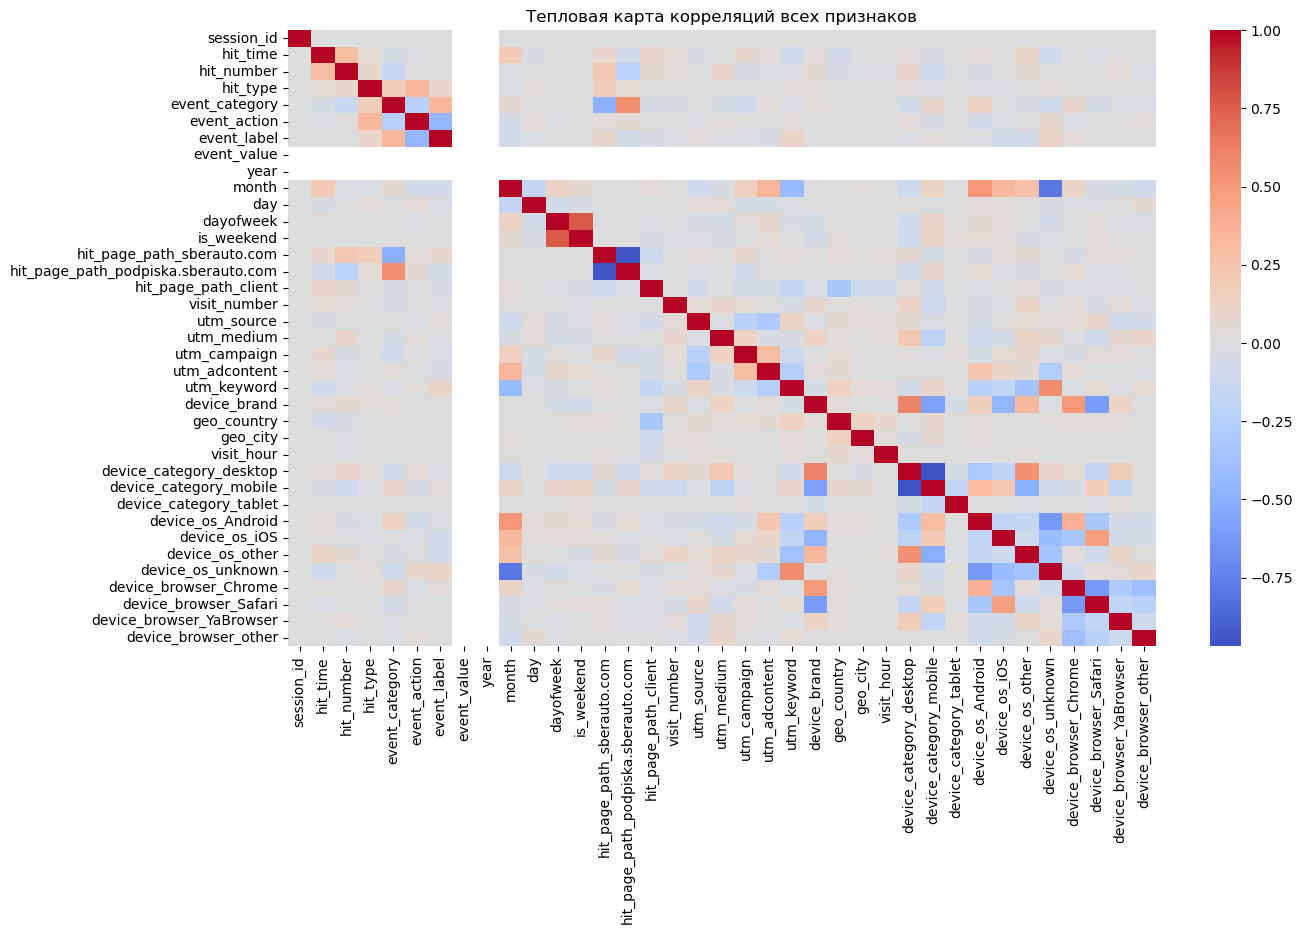

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Выберем только числовые признаки
numeric_cols = merged_df.select_dtypes(include=[np.number]).columns

# Посчитаем корреляцию
corr_with_target = merged_df[numeric_cols].corr()['hit_type'].sort_values(ascending=False)

# Показать топ 20 самых коррелирующих признаков
print(corr_with_target.head(20))

# Строим тепловую карту
plt.figure(figsize=(14, 8))
sns.heatmap(merged_df[numeric_cols].corr(), cmap='coolwarm', center=0)
plt.title('Тепловая карта корреляций всех признаков')
plt.show()


In [22]:
merged_df = merged_df.drop(columns=['event_value'])
merged_df = merged_df.drop(columns=['year'])

In [23]:
# 1. Подготовка признаков
X = merged_df.drop(columns=['session_id', 'hit_type'])  # Убираем ID и целевую переменную
y = merged_df['hit_type']  # Целевая переменная

# 2. Деление на train/test 80/20
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 3. Обучение модели CatBoost
from catboost import CatBoostClassifier

model = CatBoostClassifier(
    iterations=100, 
    learning_rate=0.1, 
    depth=6, 
    random_seed=42, 
    verbose=100
)

model.fit(X_train, y_train)

# 4. Предсказание вероятностей
y_pred_proba = model.predict_proba(X_test)[:, 1]  # Берём вероятность класса "1"

# 5. Оценка качества через ROC-AUC
from sklearn.metrics import roc_auc_score

roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"ROC-AUC на тесте: {roc_auc:.4f}")


0:	learn: 0.2852582	total: 1.32s	remaining: 2m 11s
99:	learn: 0.0000578	total: 1m 34s	remaining: 0us
ROC-AUC на тесте: 1.0000


Почитал что ROC-AUC на тесте: 1.0000 значит есть "утечка", которая явно указывает что есть колонка явно указыввающая на целевую"